In [2]:
!pip install yfinance scikit-learn matplotlib pandas numpy

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
apple = yf.download('AAPL', start='2019-01-01', end='2024-12-31')
apple.reset_index(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


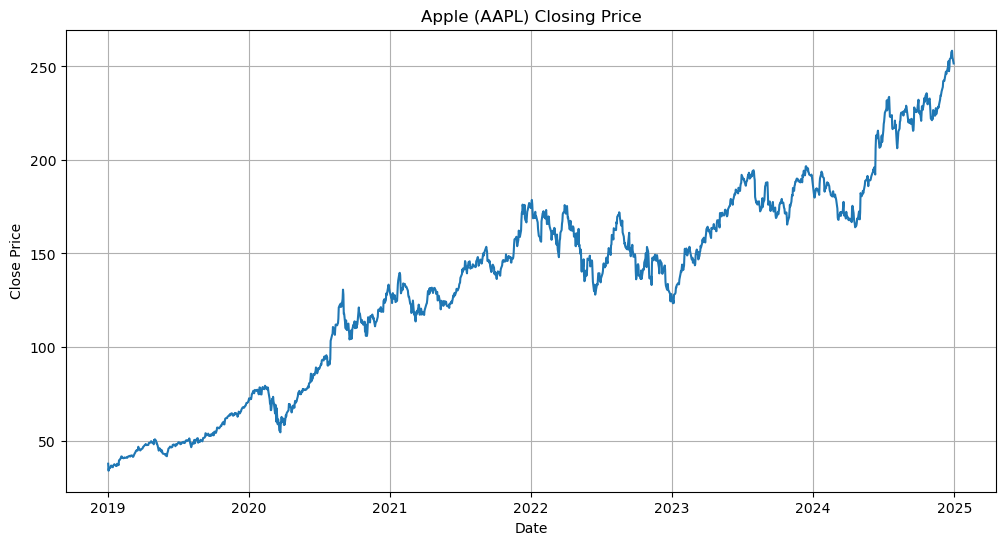

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(apple['Date'], apple['Close'])
plt.title('Apple (AAPL) Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [12]:
# Use only 'Date' and 'Close' for simplicity
df = apple[['Date', 'Close']].copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Predict 30 days into the future
future_days = 30
df['Prediction'] = df[['Close']].shift(-future_days)

In [14]:
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 12.297806947760565
R² Score: 0.9458727605177837


In [22]:
X_future = df.drop(['Prediction'], axis=1)[-future_days:]
future_predictions = model.predict(X_future)

# Show first 5 predictions
future_predictions[:5]

array([226.08801009, 229.02605062, 229.27900466, 229.97946071,
       229.51249497])

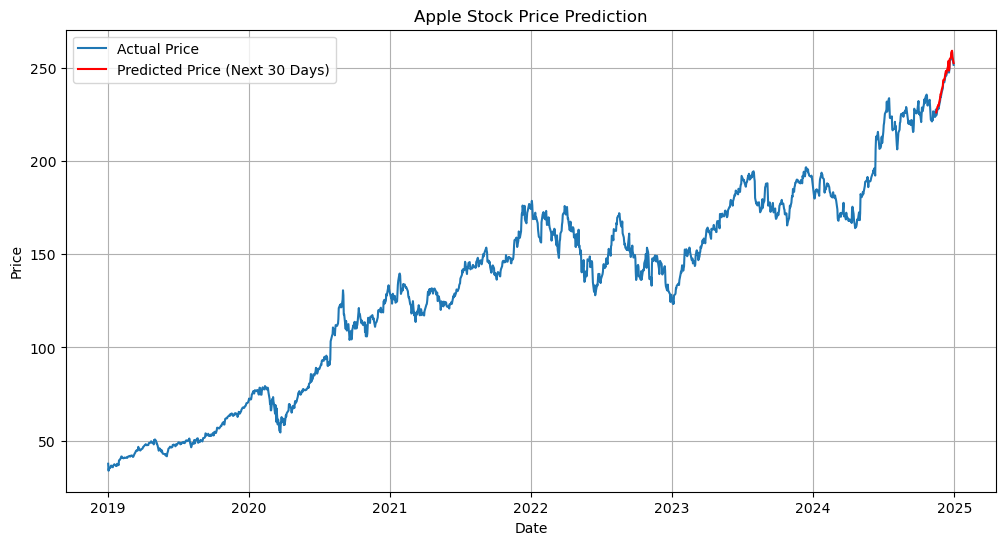

In [24]:
# Create a new DataFrame to hold future predictions
future_dates = df.index[-future_days:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Price')
plt.plot(future_dates, future_predictions, color='red', label='Predicted Price (Next 30 Days)')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()